In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

plt.rc('font', family='NanumBarunGothic')

from datetime import datetime
from pandas_datareader import data

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# **1. 데이터 로드**

In [ ]:
covid = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/covid.csv', sep = ',',parse_dates=['기준일'])
csi = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/온라인쇼핑동향/소비자동향지수.csv', sep = ',', parse_dates=['일자'])

In [ ]:
csi

,일자,소비자동향지수
0,2020-02-01,96.9
1,2020-03-01,78.4
2,2020-04-01,70.8
3,2020-05-01,77.6
4,2020-06-01,81.8
5,2020-07-01,84.2
6,2020-08-01,88.2


# **2.EDA**

## 누적 코로나 확진자/사망자 수

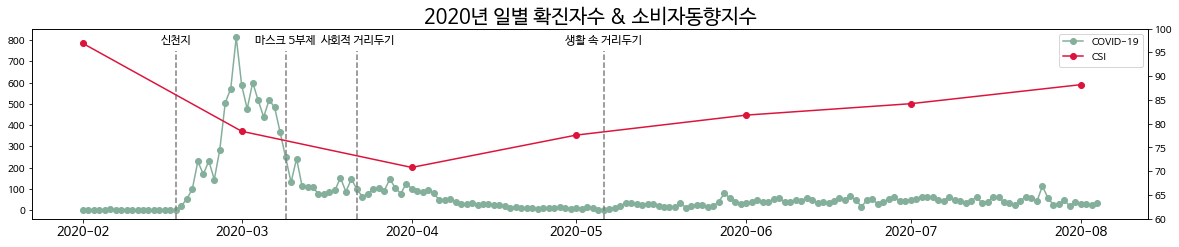

In [ ]:
# fig = plt.figure(figsize=(20,3.5))
fig, ax1 = plt.subplots(figsize=(20,3.5))

ax1.plot(covid['기준일'], covid['일별확진자수'], linestyle='-', marker='o', color='#83AF9B', label='COVID-19')
# ax1.legend(loc='upper right', prop={'size': 12})
ax1.set_title('2020년 일별 확진자수 & 소비자동향지수', size=20)
ax1.tick_params(axis="x", labelsize=13)

mycolor ='grey'; min=800
plt.axvline(x=datetime(2020,2,18), color=mycolor, linestyle='--')
plt.text(datetime(2020,2,18), min, '신천지', ha='center', va='center',rotation='horizontal', size=11.5, backgroundcolor='white') 
plt.axvline(x=datetime(2020,3,9), color=mycolor, linestyle='--')
plt.text(datetime(2020,3,9), min, '마스크 5부제', ha='center', va='center',rotation='horizontal', size=11.5, backgroundcolor='white') 
plt.axvline(x=datetime(2020,3,22), color=mycolor, linestyle='--')
plt.text(datetime(2020,3,22), min, '사회적 거리두기', ha='center', va='center',rotation='horizontal', size=11.5, backgroundcolor='white') 
# plt.axvline(x=datetime(2020,4,6), color=mycolor, linestyle='--')
# plt.text(datetime(2020,4,6), min, '고강도 사회적 거리두기', ha='center', va='center',rotation='horizontal', size=10, backgroundcolor='white') 
plt.axvline(x=datetime(2020,5,6), color=mycolor, linestyle='--')
plt.text(datetime(2020,5,6), min, '생활 속 거리두기', ha='center', va='center',rotation='horizontal', size=11.5, backgroundcolor='white')    

ax2 = ax1.twinx()
ax2.plot(csi['일자'], csi['소비자동향지수'], linestyle='-', marker='o', color='crimson', label='CSI')
ax2.set_ylim(60,100)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)

# plt.legend(loc='upper right', prop={'size': 12})